In [3]:
%matplotlib inline

In [4]:
#load dataframe with both sheets
#df_0 = pd.read_excel('/Users/michaelnaylor/Downloads/PatientData_ProgrammingAssignment.xlsx', 
                  # true_values = None, keep_default_na = True, na_filter=False, 
                 #  verbose=True, header = 1
                  # ,names=None, index_col=0, 
                 #  sheet_name = None, #sheet no in excel doc, none specifies all 
                 #  skiprows=2)
#df_0

In [5]:
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [6]:
import pandas as pd
import numpy as np 

In [10]:
url = 'https://raw.githubusercontent.com/mn20781/Hospital_App/main/PatientData_ProgrammingAssignment.xlsx'
import requests
from pprint import pprint

response = requests.get(url)
pprint(response.content)

(b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\tEF\x83v\x01\x00\x00\x18\x06'
 b'\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00'
 b'\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'
 b'\x00\x00\x00\x00\x

In [18]:
#load multiple excelsheets using ExcelFile()
pd.set_option('display.max_rows', None)
#xlsx = pd.ExcelFile('/Users/michaelnaylor/Downloads/PatientData_ProgrammingAssignment.xlsx')
#load the first sheet
url = 'https://raw.githubusercontent.com/mn20781/Hospital_App/main/PatientData_ProgrammingAssignment.xlsx'

df1 = pd.read_excel(url, "Sheet1", true_values = None, keep_default_na = True, na_filter=False, #detect
                   #missing values
                   verbose=True, header = 1
                   ,names=None, index_col=None, 
                    #sheet no in excel doc, none specifies all 
                   skiprows=2)
#load the second sheet |
df2 = pd.read_excel(url, "Sheet2", true_values = None, keep_default_na = True, na_filter=False, 
                   verbose=True, header = 1
                   ,names=None, index_col=None, 
                   #sheet_name = 1,
                     skiprows=2)

Reading sheet Sheet1
Reading sheet Sheet2


In [19]:
df1.info() #check the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                  --------------  ----- 
 0   Unnamed: 0                                                                                                                                                                                                                                                                          

In [20]:
#rename the columns using a dictionary 
col_map_df = {
    "Unnamed: 0" : "",
    "Patient_ID" : "patient_id",
    "ER_positive" : "er_positive",
    "PR_positive" : "pr_positive",
    "HER2_positive" : "her2_positive",
    "Unnamed: 6" : "",
    "Field Name" : "field_name",
    "Description" : "description"
}

In [21]:
#df.iloc["Patient_ID"]

In [22]:
patient_results = df1.rename(columns=col_map_df) #rename the dataframes columns
                                                #place in new variable patient_results

In [23]:
patient_results.columns #look up the column labels of the dataframe

Index(['', 'patient_id', 'drug_390_admin_flag', 'er_positive', 'pr_positive',
       'her2_positive', '', 'field_name', 'description',
       '* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative).'],
      dtype='object')

In [25]:
patient_results.head(n=5) #check the first 5 results in patient_results


,,patient_id,drug_390_admin_flag,er_positive,pr_positive,her2_positive,,field_name,description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
2,,2175,0,0,0,0,,ER_positive,Flag if patient is ER positive*,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
4,,2425,1,0,0,0,,HER2_positive,Flag if patient is HER2 positive*,


In [26]:
#patient_results['description'] #check the description of the data 

In [27]:
#patient_results.describe() #return the summary statistics and a few quartiles

In [28]:
#patient_results.dtypes.value_counts(sort=True)

In [29]:
#patient_results.info() #prints datatype information in addition to the count of non-null values
          #also list amount of memory used by the dataframe

In [30]:
patient_results.shape #shows how many rows and columns are in the dataframe 

(37, 10)

In [33]:
df2.info() #same as above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       339 non-null    object        
 1   Patient_ID       339 non-null    int64         
 2   Drug_admin_date  339 non-null    datetime64[ns]
 3   Length           339 non-null    object        
 4   Field Name       339 non-null    object        
 5   Description      339 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 16.0+ KB


In [36]:
#renaming columns for treatment information 
col_map = {
    "Unnamed: 0" : "",
    "Patient_ID" : "patient_id",
    "Drug_admin_date" : "drug_admin_date",
    "Length" : "length",
    "Field Name" : "field_name",
    "Description" : "description"
    
}

In [37]:
patient_treatment = df2.rename(columns=col_map) #rename using the rename function
patient_treatment.head(n=5) #check the first 5 results

,,patient_id,drug_admin_date,length,field_name,description
0,,2038,2012-01-02,,Patient_ID,Patient ID
1,,2038,2012-02-13,,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,,,
3,,2120,2005-02-05,,,
4,,2120,2009-03-31,,,


In [38]:
dates = patient_treatment[['patient_id', 'drug_admin_date']] #dataframe of patient id and admindate

In [48]:
dates.head(n=5) #first 5results of this dataframe

,patient_id,drug_admin_date
0,2038,2012-01-02
1,2038,2012-02-13
2,2038,2012-02-27
3,2120,2005-02-05
4,2120,2009-03-31


In [47]:
#loop throught dtframe and see the items 
for patient_id, date in dates.items():
    print(f'Label: {patient_id}')
    print(f'Content: {date}', sep='\n')

Label: patient_id
Content: 0      2038
1      2038
2      2038
3      2120
4      2120
5      2120
6      2120
7      2120
8      2120
9      2175
10     2175
11     2175
12     2175
13     2175
14     2175
15     2175
16     2175
17     2175
18     2407
19     2407
20     2407
21     2407
22     2407
23     2407
24     2407
25     2407
26     2407
27     2407
28     2407
29     2425
30     2425
31     2425
32     2425
33     2425
34     2462
35     2462
36     2462
37     2462
38     2462
39     2462
40     2634
41     2735
42     2735
43     2735
44     2735
45     2735
46     2735
47     2735
48     2735
49     2735
50     2735
51     2763
52     2763
53     2763
54     2763
55     2763
56     2763
57     2763
58     2763
59     2763
60     2763
61     2763
62     2763
63     2763
64     2763
65     2763
66     2763
67     2770
68     2770
69     2770
70     2770
71     2770
72     2770
73     3095
74     3095
75     3095
76     3095
77     3095
78     3095
79     3095
80     3095
8

In [49]:
patient_treatment.info() #check the info
#patient_treatment.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0                    339 non-null    object        
 1   patient_id       339 non-null    int64         
 2   drug_admin_date  339 non-null    datetime64[ns]
 3   length           339 non-null    object        
 4   field_name       339 non-null    object        
 5   description      339 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 16.0+ KB


In [53]:
patient_treatment[["drug_admin_date"]].dtypes #check the data type of the drug_admin_date column 

drug_admin_date    datetime64[ns]
dtype: object

In [52]:
#patient_treatment["patient_id"].value_counts()

In [57]:
type(patient_treatment[["patient_id"]]) #check what type of object patient_treatment['patient_id'] is

pandas.core.frame.DataFrame

In [58]:
### df_1["Drug_admin_date"].dtype #check the dytpe of 'Drug_admin_date'
#take user input and return patient information 
def cal_treatment(patient_id=0):
    user_input = int(input('Enter Patient ID :',)) #grab the user input 
    #when the user enters the patient id, the function should go through the database to 
    #find a similar value
    p_id = patient_treatment['patient_id'] == user_input 
    
    if p_id.any():
        #calculates the treatment length of the patient
        patient_treatment['length'] = patient_treatment["drug_admin_date"] - patient_treatment["drug_admin_date"].shift(1)
        
        print(patient_treatment.loc[p_id, ['patient_id', 'drug_admin_date', 'length']])
    else:
        print('Invalid Patient ID, Please Try again')
        cal_treatment()
        
    
   # result = patient_treatment["drug_admin_date"] - patient_treatment["drug_admin_date"]
    #if result > 0 :
      #  return
    #elif result <0:
        
      #  print(result, 'days of treatment')
cal_treatment() #calls the function 

Enter Patient ID :2038
   patient_id drug_admin_date  length
0        2038      2012-01-02     NaT
1        2038      2012-02-13 42 days
2        2038      2012-02-27 14 days


In [59]:
#print(patient_treatment.iloc[0:10], patient_results.iloc[0:10]) 
#take first 10 results and display them from both dataframes 

In [61]:
print(patient_treatment.memory_usage()) #check the memory usage of the dataframe 

Index               128
                   2712
patient_id         2712
drug_admin_date    2712
length             2712
field_name         2712
description        2712
dtype: int64


In [64]:
#treatment_l = patient_treatment.copy()
#treatment_l.columns

In [65]:
#treatment_l=patient_treatment.groupby(['patient_id','drug_admin_date'])['length'].sum()
#treatment_l.astype

In [66]:
#data = df_1.sort_index()
#data_copy = data.copy()

In [67]:
#data_copy[['Length']]

In [68]:
#data_copy["Length"] = data_copy["Drug_admin_date"] - data_copy["Drug_admin_date"] #calculate
#calculate treatment length 

In [69]:
#data_copy

In [70]:
#building a multiindex from the column values
#patient_data = patient_treatment.set_index(['patient_id', 'drug_admin_date', 'length']) #indexing the columns 
#patient_data.head()

In [71]:
#†rying to see what setting patient ID as the lone index will do 
#pdata=  data.set_index(['Patient_ID'])
#pdata.head()

In [72]:
#need to write a function to take in the patient id number 
#and check the next ids to see if they are similar if not,
#then if it calculates the length of treatment from the 1st index with the id to the nth

In [73]:
#pdd =  data.set_index(['Drug_admin_date'])
#pdd

In [74]:
#length = pdd.iloc[0:]

In [2]:
#pdata["Length"]= pdata['Drug_admin_date'] - pdata['Drug_admin_date'].shift(1)
#pdata

NameError: name 'pdata' is not defined

In [75]:
#pdata.loc[2120]

In [76]:
#patient_data_copy = patient_data.copy()

In [77]:
#patient_data.loc[:,[2:]]

In [79]:
#idx = pd.IndexSlice 
#df_1.loc[idx[:,"Patient_ID"], idx[:,'Drug_admin_date']]

In [80]:

#df_1 = df_1.sort_values(by="Drug_admin_date") 

In [81]:
#df_1['Length'] = pd.to_datetime(df_1['Length'])

In [82]:
#for n in df_1["Patient_ID"]:
  #  if n == df_1["Patient_ID"]:
   #     df_1[["Length"]] = df_1[["Drug_admin_date"]] - df_1[["Drug_admin_date"]].shift(1)
  #  else:
   #     df_1["Length"] = 0

In [86]:
patient_treatment[["length"]] = patient_treatment[["drug_admin_date"]] - patient_treatment[["drug_admin_date"]].shift(1)
patient_treatment

,,patient_id,drug_admin_date,length,field_name,description
0,,2038,2012-01-02,NaT,Patient_ID,Patient ID
1,,2038,2012-02-13,42 days,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,14 days,,
3,,2120,2005-02-05,-2578 days,,
4,,2120,2009-03-31,1515 days,,
5,,2120,2009-10-31,214 days,,
6,,2120,2011-04-12,528 days,,
7,,2120,2012-02-25,319 days,,
8,,2120,2013-04-26,426 days,,
9,,2175,2005-05-12,-2906 days,,


In [46]:
df_1[["Length"]] = df_1.Drug_admin_date - df_1.Drug_admin_date.shift(1)
#df_1[["Length"]] = df_1.Drug_admin_date / np.timedelta64(1, 'W')
df_1

TypeError: cannot perform __truediv__ with this index type: DatetimeArray

In [1182]:
#df_1.loc[:,"Length" < pd.Timedelta(1,'D')] = 0
df_1.loc[df_1["Length"] < pd.Timedelta(1,'D')] = 0 

In [1183]:
#df_1["Length"][df_1["Length"] < pd.Timedelta(1,'D')]
df_1

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
0,,2038,2012-01-02 00:00:00,NaT,Patient_ID,Patient ID
1,,2038,2012-02-13 00:00:00,42 days 00:00:00,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27 00:00:00,14 days 00:00:00,,
3,0,0,0,0,0,0
4,,2120,2009-03-31 00:00:00,1515 days 00:00:00,,
5,,2120,2009-10-31 00:00:00,214 days 00:00:00,,
6,,2120,2011-04-12 00:00:00,528 days 00:00:00,,
7,,2120,2012-02-25 00:00:00,319 days 00:00:00,,
8,,2120,2013-04-26 00:00:00,426 days 00:00:00,,
9,0,0,0,0,0,0


In [87]:
#df_1.loc[2:9]

In [88]:
#df_1.loc[df_1["Length"] <  pd.Timedelta(1,'D')] = 0


In [89]:
#df_1

In [90]:
#df_1[["Length"]] = df_1[["Drug_admin_date"]] - df_1[["Drug_admin_date"]].shift(1)
#df_1

In [91]:
#type(treatment_length)

In [1088]:
for n in treatment_length:
    if n < 0 :
        treatment_length[n] == 0

TypeError: '<' not supported between instances of 'str' and 'int'

In [92]:
#treatment_length = np.datetime64(drug_admin_date[:], 'W') - np.datetime64(drug_admin_date[:], 'W').shift[1]
#print("Patient",Patient_ID[0], "had treatment for",treatment_length, "Weeks")


In [101]:
#df['ER_positive'].dtype #check the data type of ER_positive column 
patient_results.shape

(37, 10)

In [96]:
patients = patient_results.groupby(['er_positive']) #group ER patients in a container called patients
patients.size()
#patients.first()
#patients.reset_index()
#positive_ER = patients.get_group(1) #put the group of positive patients in the variable positive_ER
#positive_ER

er_positive
0    18
1    19
dtype: int64

In [12]:
pizza = [n for n in df_1["Patient_ID"] if n == positive["Patient_ID"]]
pizza

NameError: name 'positive' is not defined

In [13]:
df_1

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
0,,2038,2012-01-02,,Patient_ID,Patient ID
1,,2038,2012-02-13,,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,,,
3,,2120,2005-02-05,,,
4,,2120,2009-03-31,,,
5,,2120,2009-10-31,,,
6,,2120,2011-04-12,,,
7,,2120,2012-02-25,,,
8,,2120,2013-04-26,,,
9,,2175,2005-05-12,,,


In [17]:
positive

NameError: name 'positive' is not defined

In [1218]:
positive.columns

Index(['Unnamed: 0', 'Patient_ID', 'drug_390_admin_flag', 'ER_positive',
       'PR_positive', 'HER2_positive', 'Unnamed: 6', 'Field Name',
       'Description',
       '* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative).'],
      dtype='object')

In [1223]:
positive[positive["Patient_ID"].isin(df_1["Patient_ID"])]

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
9,,2770,0,1,0,0,,,,
10,,3095,0,1,1,1,,,,
12,,3757,1,1,0,0,,,,
13,,3948,0,1,0,1,,,,
14,,4256,0,1,1,1,,,,
15,,4354,0,1,0,0,,,,
16,,4374,0,1,0,0,,,,
17,,4692,0,1,1,1,,,,


In [62]:

#df_1["treatment_length"] = 
treatment_length = df_1.loc[["Patient_ID"] == positive.loc["Patient_ID"]]
print(df_1)

NameError: name 'positive' is not defined

In [896]:
for n in df:
    if df[["Patient_ID"]].iloc[n] == patients.iloc[n]:
        print(df[["Patient_ID"]])
    

TypeError: Cannot index by location index with a non-integer key

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [418]:
df_1.columns

Index(['Unnamed: 0', 'Patient_ID', 'Drug_admin_date', 'Length', 'Field Name',
       'Description'],
      dtype='object')

In [80]:
df_1.loc[50]

Unnamed: 0                            
Patient_ID                        2735
Drug_admin_date    2012-01-29 00:00:00
Length                                
Field Name                            
Description                           
Name: 50, dtype: object

In [78]:
df1_index = pd.DataFrame(df_1, 
                        index=[["Patient_ID"]], 
                        columns=(["Patient_ID", "Drug_admin_date"]))
df1_index
df1_index_copy = df1_index.copy()

df1_index

SyntaxError: invalid syntax (4038063599.py, line 2)

In [71]:
df_1.columns

Index(['Unnamed: 0', 'Patient_ID', 'Drug_admin_date', 'Length', 'Field Name',
       'Description'],
      dtype='object')

In [70]:
type(df_1)

pandas.core.frame.DataFrame

In [74]:
type(df1_index)

pandas.core.frame.DataFrame

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [585]:
for i in df1_index.items():
    if i  == df1_index:
        print(i)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [558]:
row = next(df.iterrows())[1]
row
df1_index.keys

<bound method NDFrame.keys of      Patient_ID Drug_admin_date
0          2038      2012-01-02
1          2038      2012-02-13
2          2038      2012-02-27
3          2120      2005-02-05
4          2120      2009-03-31
..          ...             ...
334        9489      2012-06-17
335        9489      2013-03-26
336        9489      2013-06-06
337        9489      2013-07-13
338        9489      2014-05-30

[339 rows x 2 columns]>

In [703]:
index = pd.Index(df1_index, name = "Patient_Info")

#deef =  pd.DataFrame(index, 
                      #  index=index,
                     #   columns=(["Patient_ID", "Drug_admin_date"]))
#deef
index

Index([(2038, 2012-01-02 00:00:00), (2038, 2012-02-13 00:00:00),
       (2038, 2012-02-27 00:00:00), (2120, 2005-02-05 00:00:00),
       (2120, 2009-03-31 00:00:00), (2120, 2009-10-31 00:00:00),
       (2120, 2011-04-12 00:00:00), (2120, 2012-02-25 00:00:00),
       (2120, 2013-04-26 00:00:00), (2175, 2005-05-12 00:00:00),
       ...
       (9489, 2009-08-25 00:00:00), (9489, 2010-06-30 00:00:00),
       (9489, 2010-08-20 00:00:00), (9489, 2011-11-18 00:00:00),
       (9489, 2012-03-12 00:00:00), (9489, 2012-06-17 00:00:00),
       (9489, 2013-03-26 00:00:00), (9489, 2013-06-06 00:00:00),
       (9489, 2013-07-13 00:00:00), (9489, 2014-05-30 00:00:00)],
      dtype='object', name='Patient_Info', length=339)

In [1210]:
idd_ =df_1.loc['Patient_ID'] == df['Patient_ID']

KeyError: 'Patient_ID'

In [451]:
print(len(df))
df.columns

37


Index(['Unnamed: 0', 'Patient_ID', 'drug_390_admin_flag', 'ER_positive',
       'PR_positive', 'HER2_positive', 'Unnamed: 6', 'Field Name',
       'Description',
       '* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative).'],
      dtype='object')

In [509]:
#check the shape of the variable
#df_index.shape




(37, 5)

In [512]:
#creating an index of the data frame that we can use to sort through the data using Pandas Dataframe function
df_index = pd.DataFrame(df, 
                        index=range(0,37), 
                        columns=(["Patient_ID", "drug_390_admin_flag",
                                  "ER_positive","PR_positive", "HER2_positive"]))
df_index
#it needs to search row by row, at the coordinates to find the value and use that to search the coordinates of 
#next columns


,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive
0,2038,1,1,1,0
1,2120,0,1,0,1
2,2175,0,0,0,0
3,2407,0,0,1,0
4,2425,1,0,0,0
5,2462,0,0,0,0
6,2634,0,1,0,0
7,2735,1,0,1,0
8,2763,0,0,1,1
9,2770,0,1,0,0


In [770]:
#df_index.query( "drug_390_admin_flag"and"PR_positive")
#df_index[( df_index["ER_positive"]< df_index["PR_positive"])]
#df_index["drug_390_admin_flag"]
#df_index[df_index["Patient_ID"].isin([df_index["PR_positive"]])]

,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive


In [954]:
df[["PR_positive"]], df[["Patient_ID"]]

(    PR_positive
 0             1
 1             0
 2             0
 3             1
 4             0
 5             0
 6             0
 7             1
 8             1
 9             0
 10            1
 11            1
 12            0
 13            0
 14            1
 15            0
 16            0
 17            1
 18            0
 19            1
 20            1
 21            0
 22            0
 23            0
 24            1
 25            1
 26            0
 27            0
 28            0
 29            1
 30            0
 31            0
 32            0
 33            0
 34            0
 35            1
 36            1,
     Patient_ID
 0         2038
 1         2120
 2         2175
 3         2407
 4         2425
 5         2462
 6         2634
 7         2735
 8         2763
 9         2770
 10        3095
 11        3449
 12        3757
 13        3948
 14        4256
 15        4354
 16        4374
 17        4692
 18        5259
 19        5657
 20        6281
 

In [947]:
patients = df.groupby('PR_positive')
#print(df.groupby(['Patient_ID']).groups)
patients.head()

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
2,,2175,0,0,0,0,,ER_positive,Flag if patient is ER positive*,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
4,,2425,1,0,0,0,,HER2_positive,Flag if patient is HER2 positive*,
5,,2462,0,0,0,0,,,,
6,,2634,0,1,0,0,,,,
7,,2735,1,0,1,0,,,,
8,,2763,0,0,1,1,,,,
10,,3095,0,1,1,1,,,,


In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [458]:
#grab the index of the column 
#test example
df_index.iloc[36]

Patient_ID             9489
drug_390_admin_flag       0
PR_positive               1
ER_positive               0
HER2_positive             1
Name: 36, dtype: int64

In [958]:
df_index.iloc[0:], df.columns.get_indexer(['Patient_ID', 
                                     "PR_positive", "ER_positive"])

(    Patient_ID  drug_390_admin_flag  ER_positive  PR_positive  HER2_positive
 0         2038                    1            1            1              0
 1         2120                    0            1            0              1
 2         2175                    0            0            0              0
 3         2407                    0            0            1              0
 4         2425                    1            0            0              0
 5         2462                    0            0            0              0
 6         2634                    0            1            0              0
 7         2735                    1            0            1              0
 8         2763                    0            0            1              1
 9         2770                    0            1            0              0
 10        3095                    0            1            1              1
 11        3449                    0            0            1  

In [880]:
df_index.iloc[0:], df.columns.get_indexer(['Patient_ID']) 

(    Patient_ID  drug_390_admin_flag  ER_positive  PR_positive  HER2_positive
 0         2038                    1            1            1              0
 1         2120                    0            1            0              1
 2         2175                    0            0            0              0
 3         2407                    0            0            1              0
 4         2425                    1            0            0              0
 5         2462                    0            0            0              0
 6         2634                    0            1            0              0
 7         2735                    1            0            1              0
 8         2763                    0            0            1              1
 9         2770                    0            1            0              0
 10        3095                    0            1            1              1
 11        3449                    0            0            1  

In [1059]:
df.loc[[1],["Patient_ID"]]

,Patient_ID
1,2120


In [1016]:
positive_tests.columns

Index(['Unnamed: 0', 'Patient_ID', 'drug_390_admin_flag', 'ER_positive',
       'PR_positive', 'HER2_positive', 'Unnamed: 6', 'Field Name',
       'Description',
       '* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative).'],
      dtype='object')

In [1227]:
tests = positive_tests[positive_tests["Patient_ID"].isin(df_1["Patient_ID"])]

In [1248]:
#positive_tests["Patient_ID"].isin(df_1["Patient_ID"])
pos = positive_tests["Patient_ID"].items
pos

<bound method Series.items of 0     2038
1     2120
3     2407
6     2634
7     2735
8     2763
9     2770
10    3095
11    3449
12    3757
13    3948
14    4256
15    4354
16    4374
17    4692
18    5259
19    5657
20    6281
22    6837
24    6877
25    6889
26    6922
28    7242
29    7796
33    8615
34    8827
35    9331
36    9489
Name: Patient_ID, dtype: int64>

In [1239]:
df_1["Positives"] = positive_tests["Patient_ID"] for n in positive_tests["Patient_ID"]

In [1243]:
df_1

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description,Positives
0,,2038,2012-01-02 00:00:00,NaT,Patient_ID,Patient ID,2038.0
1,,2038,2012-02-13 00:00:00,42 days 00:00:00,Drug_admin_date,Date of drug administration,2120.0
2,,2038,2012-02-27 00:00:00,14 days 00:00:00,,,NaN
3,0,0,0,0,0,0,2407.0
4,,2120,2009-03-31 00:00:00,1515 days 00:00:00,,,NaN
5,,2120,2009-10-31 00:00:00,214 days 00:00:00,,,NaN
6,,2120,2011-04-12 00:00:00,528 days 00:00:00,,,2634.0
7,,2120,2012-02-25 00:00:00,319 days 00:00:00,,,2735.0
8,,2120,2013-04-26 00:00:00,426 days 00:00:00,,,2763.0
9,0,0,0,0,0,0,2770.0


In [1298]:
#df_1[["Positives"]]= df_1.loc[df_1["Patient_ID"] & positive_tests["Patient_ID"], 
                            #  df_1["Positive"]] = 0
posit=  positive_tests["Patient_ID"]
#select items in patient ID
df_1.groupby([["Patient_ID"], posit])

AttributeError: 'str' object has no attribute 'groupby'

In [1251]:
#df_1[df_1['Patient_ID'] == positive_tests[['Patient_ID']].items]
df_1['Patient_ID']

0      2038
1      2038
2      2038
3         0
4      2120
5      2120
6      2120
7      2120
8      2120
9         0
10     2175
11     2175
12     2175
13     2175
14     2175
15     2175
16     2175
17     2175
18        0
19     2407
20     2407
21     2407
22     2407
23     2407
24     2407
25     2407
26     2407
27     2407
28     2407
29        0
30     2425
31     2425
32     2425
33     2425
34        0
35     2462
36     2462
37     2462
38     2462
39     2462
40        0
41     2735
42     2735
43        0
44     2735
45     2735
46        0
47     2735
48     2735
49     2735
50     2735
51        0
52     2763
53     2763
54     2763
55     2763
56     2763
57     2763
58     2763
59     2763
60     2763
61     2763
62     2763
63     2763
64     2763
65     2763
66     2763
67        0
68     2770
69     2770
70     2770
71     2770
72     2770
73        0
74     3095
75     3095
76     3095
77     3095
78     3095
79     3095
80     3095
81     3095
82     3095
83  

In [879]:
df.iloc[[22], df.columns.get_indexer(['Patient_ID',  
                                     "PR_positive", "ER_positive"])], df.iloc[[0], df.columns.get_indexer(['Patient_ID',  
                                     "PR_positive", "ER_positive"])]

(    Patient_ID  PR_positive  ER_positive
 22        6837            0            1,
    Patient_ID  PR_positive  ER_positive
 0        2038            1            1)

In [523]:
df.values

array([['', 2038, 1, 1, 1, 0, '', 'Patient_ID', 'Patient ID', ''],
       ['', 2120, 0, 1, 0, 1, '', 'drug_390_admin_flag',
        'Flag if patient has been given Drug 390 (1 = Yes, 0 = No)', ''],
       ['', 2175, 0, 0, 0, 0, '', 'ER_positive',
        'Flag if patient is ER positive*', ''],
       ['', 2407, 0, 0, 1, 0, '', 'PR_positive',
        'Flag if patient is PR positive*', ''],
       ['', 2425, 1, 0, 0, 0, '', 'HER2_positive',
        'Flag if patient is HER2 positive*', ''],
       ['', 2462, 0, 0, 0, 0, '', '', '', ''],
       ['', 2634, 0, 1, 0, 0, '', '', '', ''],
       ['', 2735, 1, 0, 1, 0, '', '', '', ''],
       ['', 2763, 0, 0, 1, 1, '', '', '', ''],
       ['', 2770, 0, 1, 0, 0, '', '', '', ''],
       ['', 3095, 0, 1, 1, 1, '', '', '', ''],
       ['', 3449, 0, 0, 1, 0, '', '', '', ''],
       ['', 3757, 1, 1, 0, 0, '', '', '', ''],
       ['', 3948, 0, 1, 0, 1, '', '', '', ''],
       ['', 4256, 0, 1, 1, 1, '', '', '', ''],
       ['', 4354, 0, 1, 0, 0, '', '',

In [486]:
#criterion = df['Patient_ID'].map(lambda x: x.startswith(1))
positive_tests = {'drug_390_admin_flag': [1],"PR_positive":[1], "ER_positive":[1], "HER2_positive":[1] }
#s= df.isin(positive_tests).any(1)
df.query('a < b & b < c')

AttributeError: 'dict' object has no attribute 'where'

In [407]:
#data frame with data from the first sheet
#df = pd.read_excel('/Users/michaelnaylor/Downloads/PatientData_ProgrammingAssignment.xlsx', 
                 #  true_values = None, keep_default_na = True, na_filter=False, 
                 #  verbose=True, header = 1
                 #  ,names=None, index_col=None, 
                 #  sheet_name = 0, #sheet no in excel doc, 
                 #  skiprows=2)

                  
#df.head() #print the first 5 values to see if data has loaded properly 
#df.dropna() #drop the NaN values in the dataset 
#df.dropna(axis='columns')
#df.head() #shows the first 5 elements
#

In [285]:
#drug_data = df.values
#drug_data

array([['', 2038, 1, 1, 1, 0, '', 'Patient_ID', 'Patient ID', ''],
       ['', 2120, 0, 1, 0, 1, '', 'drug_390_admin_flag',
        'Flag if patient has been given Drug 390 (1 = Yes, 0 = No)', ''],
       ['', 2175, 0, 0, 0, 0, '', 'ER_positive',
        'Flag if patient is ER positive*', ''],
       ['', 2407, 0, 0, 1, 0, '', 'PR_positive',
        'Flag if patient is PR positive*', ''],
       ['', 2425, 1, 0, 0, 0, '', 'HER2_positive',
        'Flag if patient is HER2 positive*', ''],
       ['', 2462, 0, 0, 0, 0, '', '', '', ''],
       ['', 2634, 0, 1, 0, 0, '', '', '', ''],
       ['', 2735, 1, 0, 1, 0, '', '', '', ''],
       ['', 2763, 0, 0, 1, 1, '', '', '', ''],
       ['', 2770, 0, 1, 0, 0, '', '', '', ''],
       ['', 3095, 0, 1, 1, 1, '', '', '', ''],
       ['', 3449, 0, 0, 1, 0, '', '', '', ''],
       ['', 3757, 1, 1, 0, 0, '', '', '', ''],
       ['', 3948, 0, 1, 0, 1, '', '', '', ''],
       ['', 4256, 0, 1, 1, 1, '', '', '', ''],
       ['', 4354, 0, 1, 0, 0, '', '',

In [393]:
df_Z = pd.DataFrame(
                      index=list('012345'))#,
                      #columns=list('Patient_ID','ER_positive'))
df_Z

""
0
1
2
3
4
5


In [350]:
#drug_data[[
type(df)

pandas.core.frame.DataFrame

37
[9489] [2425]


,ER_positive
0,1
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,1


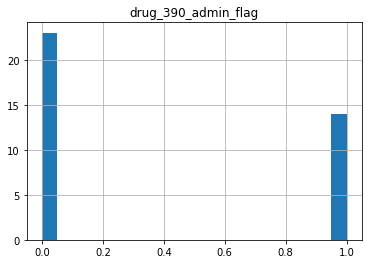

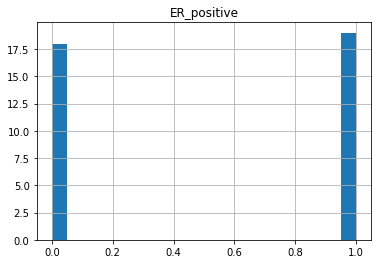

In [361]:
#df[["Patient_ID"]]
patient_ID = df[["Patient_ID"]].values
#print(df.columns) #show the column names 
#df.columns[2] #show the label of column in index 2
print(len(patient_ID))
print(patient_ID[36], patient_ID[4])

#df[["Patient_ID"]].head()
hist = df[["drug_390_admin_flag"]].hist(grid=True, bins=20)#creating a histogram to visualise the data 
hist = df[["ER_positive"]].hist(grid=True, bins = 20)
df[["ER_positive"]]

In [363]:
for n in df[["ER_positive"]]:
    if n == 1:
        print (n)

In [613]:
drug_admin= df.loc[df["drug_390_admin_flag"] >= 1]
len(drug_admin)

14

In [18]:
er_Positive = df.loc[df["ER_positive"] >= 1] #print rows with column values 1 or greater
len(er_Positive)

19

In [19]:
pr_Positive =df.loc[df["PR_positive"] >= 1]
len(pr_Positive)

15

In [33]:
df.count()

Unnamed: 0                                                                                                                                                                                                                                                                                37
Patient_ID                                                                                                                                                                                                                                                                                37
drug_390_admin_flag                                                                                                                                                                                                                                                                       37
ER_positive                                                                                                                                      

In [813]:
df_1["Patient_ID"].count()

339

In [925]:
pr_Positive.to_numpy()

array([['', 2038, 1, 1, 1, 0, '', 'Patient_ID', 'Patient ID', ''],
       ['', 2407, 0, 0, 1, 0, '', 'PR_positive',
        'Flag if patient is PR positive*', ''],
       ['', 2735, 1, 0, 1, 0, '', '', '', ''],
       ['', 2763, 0, 0, 1, 1, '', '', '', ''],
       ['', 3095, 0, 1, 1, 1, '', '', '', ''],
       ['', 3449, 0, 0, 1, 0, '', '', '', ''],
       ['', 4256, 0, 1, 1, 1, '', '', '', ''],
       ['', 4692, 0, 1, 1, 1, '', '', '', ''],
       ['', 5657, 1, 0, 1, 1, '', '', '', ''],
       ['', 6281, 0, 0, 1, 1, '', '', '', ''],
       ['', 6877, 1, 1, 1, 1, '', '', '', ''],
       ['', 6889, 0, 1, 1, 0, '', '', '', ''],
       ['', 7796, 1, 0, 1, 1, '', '', '', ''],
       ['', 9331, 0, 0, 1, 0, '', '', '', ''],
       ['', 9489, 0, 0, 1, 1, '', '', '', '']], dtype=object)

In [924]:
pr_Positive["Patient_ID"].isin(df_1["Patient_ID"]) #check if the values in pr_positive are in df_1

0     True
3     True
7     True
8     True
10    True
11    True
14    True
17    True
19    True
20    True
24    True
25    True
29    True
35    True
36    True
Name: Patient_ID, dtype: bool

In [909]:
positive_IDs = pr_Positive.groupby('Patient_ID')
for n, name in positive_IDs:
    print(n)
   # if n == df_1[["Patient_ID"]]:
      #  print(df_1["drug_admin_date"])

2038
2407
2735
2763
3095
3449
4256
4692
5657
6281
6877
6889
7796
9331
9489


In [966]:
positive_IDs.dtype

AttributeError: 'DataFrameGroupBy' object has no attribute 'dtype'

In [960]:
positive_tests

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
10,,3095,0,1,1,1,,,,
14,,4256,0,1,1,1,,,,
17,,4692,0,1,1,1,,,,
24,,6877,1,1,1,1,,,,
25,,6889,0,1,1,0,,,,


In [610]:
er_Negative = df.loc[df["ER_positive"] == 0]
len(er_Negative)

18

In [615]:
pr_Negative = df.loc[df["PR_positive"] == 0]
len(pr_Negative)

22

In [961]:
positive_tests = [pr_Positive, er_Positive] #creates a list
len(positive_tests)

2

In [965]:
positive_tests.i


<function list.index(value, start=0, stop=9223372036854775807, /)>

In [20]:
positive_tests = df.loc[(df["PR_positive"] == 1) | (df["ER_positive"] ==1)]

In [21]:
positive_tests

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
6,,2634,0,1,0,0,,,,
7,,2735,1,0,1,0,,,,
8,,2763,0,0,1,1,,,,
9,,2770,0,1,0,0,,,,
10,,3095,0,1,1,1,,,,
11,,3449,0,0,1,0,,,,
12,,3757,1,1,0,0,,,,


In [139]:
patient_data_copy.loc[, Drug_admin_date]- patient_data_copy.loc[, :].shift(1)

SyntaxError: invalid syntax (4064382033.py, line 2)

In [140]:
patient_data_copy.xs(level='Patient_ID')

TypeError: xs() missing 1 required positional argument: 'key'

In [143]:
patient_data_copy.iloc[1:,]

Unnamed: 0       Field Name  \
Patient_ID Drug_admin_date Length                               
2038       2012-02-13                         Drug_admin_date   
           2012-02-27                                           
2120       2005-02-05                                           
           2009-03-31                                           
           2009-10-31                                           
           2011-04-12                                           
           2012-02-25                                           
           2013-04-26                                           
2175       2005-05-12                                           
           2005-12-10                                           
           2007-04-23                                           
           2008-02-05                                           
           2008-04-14                                           
           2009-05-26                                           
           2013-01-25                                           
           2013-01-29                                           
           2013-08-17                                           
2407       2005-03-13                                           
           2006-03-28                                           
           2006-04-08                                           
           2006-05-18                                           
           2006-09-04                                           
           2007-04-29                                           
           2008-06-18                                           
           2009-06-17                                           
           2009-08-16                                           
           2010-02-09                                           
           2011-01-21                                           
2425       2005-08-30                                           
           2006-04-04                                           
           2006-06-24                                           
           2006-08-03                                           
           2011-02-06                                           
2462       2006-01-13                                           
           2006-07-12                                           
           2006-09-05                                           
           2007-01-20                                           
           2007-06-01                                           
           2010-12-15                                           
2634       2010-01-30                                           
2735       2012-01-07                                           
           2012-01-09                                           
                                                                
           2012-01-11                                           
           2012-01-15                                           
                                                                
           2012-01-17                                           
           2012-01-19                                           
           2012-01-27                                           
           2012-01-29                                           
2763       2005-04-17                                           
           2005-07-19                                           
           2005-08-28                                           
           2005-09-25                                           
           2006-05-04                                           
           2007-07-15                                           
           2007-11-14                                           
           2008-01-12                                           
           2008-06-22                                           
           2010-10-22                                           
    

In [126]:
pizza = [n for n in positive_tests["Patient_ID"] for y in df_1["Patient_ID"]if n == y]
print(len(pizza), pizza)

263 [2038, 2038, 2038, 2120, 2120, 2120, 2120, 2120, 2120, 2407, 2407, 2407, 2407, 2407, 2407, 2407, 2407, 2407, 2407, 2407, 2634, 2735, 2735, 2735, 2735, 2735, 2735, 2735, 2735, 2735, 2735, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2770, 2770, 2770, 2770, 2770, 2770, 3095, 3095, 3095, 3095, 3095, 3095, 3095, 3095, 3095, 3095, 3095, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3757, 3757, 3757, 3757, 3757, 3757, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 3948, 4256, 4256, 4256, 4256, 4256, 4256, 4256, 4256, 4256, 4256, 4354, 4354, 4354, 4354, 4354, 4354, 4354, 4354, 4354, 4354, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4374, 4692, 4692, 4692, 4692, 4692, 4692, 4692, 4692, 5259, 5259, 5259, 5259, 5259, 5259, 5259, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 5657, 6281, 6281, 6281,

In [47]:
df_1copy = df_1.copy()
df_1copy

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
0,,2038,2012-01-02,NaT,Patient_ID,Patient ID
1,,2038,2012-02-13,42 days,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,14 days,,
3,,2120,2005-02-05,-2578 days,,
4,,2120,2009-03-31,1515 days,,
5,,2120,2009-10-31,214 days,,
6,,2120,2011-04-12,528 days,,
7,,2120,2012-02-25,319 days,,
8,,2120,2013-04-26,426 days,,
9,,2175,2005-05-12,-2906 days,,


In [ ]:
df_1["Positives"] = positive_tests["Patient_ID"] for n in positive_tests["Patient_ID"]

In [52]:
df_1copy["length"] = #[df_1['Patient_ID'].duplicated() == True for n in positive_tests["Patient_ID"] 
                      for y in df_1["Patient_ID"]if n == y]= df_1[["Drug_admin_date"]] - df_1[["Drug_admin_date"]].shift(1)

SyntaxError: invalid syntax (1237956702.py, line 1)

In [59]:
df_1copy["length"] = ['Positive'
                      for n in positive_tests["Patient_ID"]
                      for y in df_1["Patient_ID"]
                      if n == y]#df_1[["Drug_admin_date"]] - df_1[["Drug_admin_date"]].shift(1)

ValueError: Length of values (263) does not match length of index (339)

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description,length
0,,2038.0,2012-01-02 00:00:00,,Patient_ID,Patient ID,NaT
1,NaN,NaN,42 days 00:00:00,NaN,NaN,NaN,NaT
2,NaN,NaN,14 days 00:00:00,NaN,NaN,NaN,NaT
3,,2120.0,2005-02-05 00:00:00,,,,-2578 days
4,NaN,NaN,1515 days 00:00:00,NaN,NaN,NaN,NaT
5,NaN,NaN,214 days 00:00:00,NaN,NaN,NaN,NaT
6,NaN,NaN,528 days 00:00:00,NaN,NaN,NaN,NaT
7,NaN,NaN,319 days 00:00:00,NaN,NaN,NaN,NaT
8,NaN,NaN,426 days 00:00:00,NaN,NaN,NaN,NaT
9,,2175.0,2005-05-12 00:00:00,,,,-2906 days


In [32]:
df_1["Patient_ID"].value_counts()

9489    21
4374    19
2763    16
8480    16
6889    15
7230    15
6281    14
3449    14
5657    13
3948    12
3095    11
9331    11
2407    11
4354    10
2735    10
4256    10
7796     9
8615     9
2175     9
4692     8
6877     8
7976     8
6321     8
5259     7
6840     7
3757     6
8827     6
2770     6
2120     6
2462     6
2425     5
7242     5
2038     3
7937     2
6837     1
6922     1
2634     1
Name: Patient_ID, dtype: int64

In [33]:
len(df_1["Patient_ID"])

339

In [37]:
df_1.loc[df_1["Patient_ID"] == 9489]

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
318,,9489,2005-01-13,,,
319,,9489,2005-03-26,,,
320,,9489,2005-04-30,,,
321,,9489,2006-01-25,,,
322,,9489,2006-01-26,,,
323,,9489,2006-10-29,,,
324,,9489,2007-07-07,,,
325,,9489,2007-07-26,,,
326,,9489,2007-10-10,,,
327,,9489,2007-12-05,,,


In [29]:
df_1["Positive"] = [n for n in positive_tests["Patient_ID"] for y in df_1["Patient_ID"]if n == y]

ValueError: Length of values (263) does not match length of index (339)

In [1093]:
positive_tests.columns

Index(['Unnamed: 0', 'Patient_ID', 'drug_390_admin_flag', 'ER_positive',
       'PR_positive', 'HER2_positive', 'Unnamed: 6', 'Field Name',
       'Description',
       '* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative).'],
      dtype='object')

In [937]:
pr_Negative["Patient_ID"].isin(df_1["Patient_ID"])

1     True
2     True
4     True
5     True
6     True
9     True
12    True
13    True
15    True
16    True
18    True
21    True
22    True
23    True
26    True
27    True
28    True
30    True
31    True
32    True
33    True
34    True
Name: Patient_ID, dtype: bool

In [1]:
negative_tests = df.loc[(df["PR_positive"] == 0) & (df["ER_positive"] ==0)]

NameError: name 'df' is not defined

In [854]:
#positive_tests.values
df['Patient_ID'].values

array([2038, 2120, 2175, 2407, 2425, 2462, 2634, 2735, 2763, 2770, 3095,
       3449, 3757, 3948, 4256, 4354, 4374, 4692, 5259, 5657, 6281, 6321,
       6837, 6840, 6877, 6889, 6922, 7230, 7242, 7796, 7937, 7976, 8480,
       8615, 8827, 9331, 9489])

In [1108]:
len(df)-len(positive_tests) 

9

In [1106]:
#loop through the patients with positive tests
for n in positive_tests["Patient_ID"]:
   # for ide in df_1[['Patient_ID']]:
       # while df[n] == df_1[ide]:
            print("Patient_ID:",n)
print("There are:", len(positive_tests), "positive tests")

Patient_ID: 2038
Patient_ID: 2120
Patient_ID: 2407
Patient_ID: 2634
Patient_ID: 2735
Patient_ID: 2763
Patient_ID: 2770
Patient_ID: 3095
Patient_ID: 3449
Patient_ID: 3757
Patient_ID: 3948
Patient_ID: 4256
Patient_ID: 4354
Patient_ID: 4374
Patient_ID: 4692
Patient_ID: 5259
Patient_ID: 5657
Patient_ID: 6281
Patient_ID: 6837
Patient_ID: 6877
Patient_ID: 6889
Patient_ID: 6922
Patient_ID: 7242
Patient_ID: 7796
Patient_ID: 8615
Patient_ID: 8827
Patient_ID: 9331
Patient_ID: 9489
There are: 28 positive tests


In [1104]:
#create class to sort patient information  
class Patient_Info:
    def __init__(self, patient_ID, diagnosis, treatment_length):
        self.patient_ID = patient_ID
        self.diagnosis = diagnosis
        self.treatment_length = treatment_length

SyntaxError: unexpected EOF while parsing (3880707653.py, line 2)

AttributeError: 'list' object has no attribute 'columns'

In [781]:
negative_tests

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
2,,2175,0,0,0,0,,ER_positive,Flag if patient is ER positive*,
4,,2425,1,0,0,0,,HER2_positive,Flag if patient is HER2 positive*,
5,,2462,0,0,0,0,,,,
21,,6321,1,0,0,0,,,,
23,,6840,1,0,0,1,,,,
27,,7230,1,0,0,0,,,,
30,,7937,0,0,0,0,,,,
31,,7976,0,0,0,0,,,,
32,,8480,0,0,0,0,,,,


In [799]:
grp1 = negative_tests.groupby('Patient_ID')
for n, name in grp1:
    print(n)
   # print(name)

   # print()

2175
2425
2462
6321
6840
7230
7937
7976
8480


In [773]:
positive_tests_0 = df.loc[df["Patient_ID"].isin(positive_tests)]
positive_tests_0

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."


In [776]:
df.loc[:"Patient_ID"]

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
2,,2175,0,0,0,0,,ER_positive,Flag if patient is ER positive*,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
4,,2425,1,0,0,0,,HER2_positive,Flag if patient is HER2 positive*,
5,,2462,0,0,0,0,,,,
6,,2634,0,1,0,0,,,,
7,,2735,1,0,1,0,,,,
8,,2763,0,0,1,1,,,,
9,,2770,0,1,0,0,,,,


In [833]:
#creating a function to loop through the values of df["Patient_ID"]
#def treatment_length():
for n in df["Patient_ID"].values:
    for num in range(len(positive_tests)):
        if positive_tests[num] == positive_tests:
            print(positive_tests[num])
            Q
        
                

KeyError: 0

In [823]:
positive_tests

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
10,,3095,0,1,1,1,,,,
14,,4256,0,1,1,1,,,,
17,,4692,0,1,1,1,,,,
24,,6877,1,1,1,1,,,,
25,,6889,0,1,1,0,,,,


In [641]:
positive_tests[0]

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
7,,2735,1,0,1,0,,,,
8,,2763,0,0,1,1,,,,
10,,3095,0,1,1,1,,,,
11,,3449,0,0,1,0,,,,
14,,4256,0,1,1,1,,,,
17,,4692,0,1,1,1,,,,
19,,5657,1,0,1,1,,,,
20,,6281,0,0,1,1,,,,


In [651]:
df.loc[["Patient_ID"]]

KeyError: "None of [Index(['Patient_ID'], dtype='object')] are in the [index]"

In [638]:
total_positives = len(positive_tests[0]) + len(positive_tests[1])
total_positives

34

In [317]:
#need to create a class that allows you to store the patient ID values as the value to be called. 
#The function should give you the ability to search for an ID by imputting a list of values
#further consideration should be kept for interaction, in the UI such as a searchbar that attempts to predict
#the number that will be entered. The function can only accept INTs that are 4 numbers long. 
type(df[['Patient_ID']])

pandas.core.frame.DataFrame

In [192]:
df_1 = pd.read_excel('/Users/michaelnaylor/Downloads/PatientData_ProgrammingAssignment.xlsx', 
                   true_values = None, keep_default_na = True, na_filter=False, 
                   verbose=True, header = 1
                   ,names=None, index_col=None, 
                   sheet_name = 1, skiprows=2)
df_1.head()

Reading sheet 1


,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
0,,2038,2012-01-02,,Patient_ID,Patient ID
1,,2038,2012-02-13,,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,,,
3,,2120,2005-02-05,,,
4,,2120,2009-03-31,,,


In [210]:
df_1[['Drug_admin_date']], df_1[['Patient_ID']]

(    Drug_admin_date
 0        2012-01-02
 1        2012-02-13
 2        2012-02-27
 3        2005-02-05
 4        2009-03-31
 ..              ...
 334      2012-06-17
 335      2013-03-26
 336      2013-06-06
 337      2013-07-13
 338      2014-05-30
 
 [339 rows x 1 columns],
      Patient_ID
 0          2038
 1          2038
 2          2038
 3          2120
 4          2120
 ..          ...
 334        9489
 335        9489
 336        9489
 337        9489
 338        9489
 
 [339 rows x 1 columns])

In [67]:

df_1copy

,Unnamed: 0,Patient_ID,Drug_admin_date,Length,Field Name,Description
Patient_ID,,,,,,
0,,2038,2012-01-02,NaT,Patient_ID,Patient ID
1,,2038,2012-02-13,42 days,Drug_admin_date,Date of drug administration
2,,2038,2012-02-27,14 days,,
3,,2120,2005-02-05,-2578 days,,
4,,2120,2009-03-31,1515 days,,
5,,2120,2009-10-31,214 days,,
6,,2120,2011-04-12,528 days,,
7,,2120,2012-02-25,319 days,,
8,,2120,2013-04-26,426 days,,


In [68]:
features = ["Patient_ID", "Drug_admin_date"]
print(df_1[features])

     Patient_ID Drug_admin_date
0          2038      2012-01-02
1          2038      2012-02-13
2          2038      2012-02-27
3          2120      2005-02-05
4          2120      2009-03-31
5          2120      2009-10-31
6          2120      2011-04-12
7          2120      2012-02-25
8          2120      2013-04-26
9          2175      2005-05-12
10         2175      2005-12-10
11         2175      2007-04-23
12         2175      2008-02-05
13         2175      2008-04-14
14         2175      2009-05-26
15         2175      2013-01-25
16         2175      2013-01-29
17         2175      2013-08-17
18         2407      2005-03-13
19         2407      2006-03-28
20         2407      2006-04-08
21         2407      2006-05-18
22         2407      2006-09-04
23         2407      2007-04-29
24         2407      2008-06-18
25         2407      2009-06-17
26         2407      2009-08-16
27         2407      2010-02-09
28         2407      2011-01-21
29         2425      2005-08-30
30      

In [ ]:
#for ID in features:

In [ ]:
#function to calculate the length of a patients treatment

#def treatmenttime():
    
    

In [211]:
df['drug_390_admin_flag'].values
print("Column Name:",df.columns[2],"\nValues:",df['drug_390_admin_flag'].values,
      "\nNo. of Values:",len(df['drug_390_admin_flag'])
      ,"\nMean:", sum(df["drug_390_admin_flag"])/len(df["drug_390_admin_flag"]))

Column Name: drug_390_admin_flag 
Values: [1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0] 
No. of Values: 37 
Mean: 0.3783783783783784


In [ ]:
df

In [217]:
data = df.iloc[:,2].values
data

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [235]:
print("First 5 numbers in this ndarray:",data[0:5] )#data[1])

First 5 numbers in this ndarray: [1 0 0 0 1]


In [241]:
#we need a function that compares the key to the value of the vectors in each column 
patient_ID = df_1['Patient_ID'].values
drug_admin_date = df_1['Drug_admin_date'].values
patient_ID

array([2038, 2038, 2038, 2120, 2120, 2120, 2120, 2120, 2120, 2175, 2175,
       2175, 2175, 2175, 2175, 2175, 2175, 2175, 2407, 2407, 2407, 2407,
       2407, 2407, 2407, 2407, 2407, 2407, 2407, 2425, 2425, 2425, 2425,
       2425, 2462, 2462, 2462, 2462, 2462, 2462, 2634, 2735, 2735, 2735,
       2735, 2735, 2735, 2735, 2735, 2735, 2735, 2763, 2763, 2763, 2763,
       2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763, 2763,
       2763, 2770, 2770, 2770, 2770, 2770, 2770, 3095, 3095, 3095, 3095,
       3095, 3095, 3095, 3095, 3095, 3095, 3095, 3449, 3449, 3449, 3449,
       3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3449, 3757,
       3757, 3757, 3757, 3757, 3757, 3948, 3948, 3948, 3948, 3948, 3948,
       3948, 3948, 3948, 3948, 3948, 3948, 4256, 4256, 4256, 4256, 4256,
       4256, 4256, 4256, 4256, 4256, 4354, 4354, 4354, 4354, 4354, 4354,
       4354, 4354, 4354, 4354, 4374, 4374, 4374, 4374, 4374, 4374, 4374,
       4374, 4374, 4374, 4374, 4374, 4374, 4374, 43

In [268]:
#df_1[Patient_ID]
#create a function which counts how many times an ID appears in the array, 
#then arranges the  patient ID in sequential order, smallest to largest without repetitions
patient_ID[0]

#for x, ID in np.ndenumerate(patient_ID):
    #print(x, ID)
    


2038

In [239]:
#test out the patient ID array 
patient_ID[0]

2038

In [242]:
#test out drug admin date data
drug_admin_date[0]

numpy.datetime64('2012-01-02T00:00:00.000000000')

In [256]:
#variable to store the treatment length
treatment_length = np.datetime64(drug_admin_date[0], 'W') - np.datetime64(drug_admin_date[1], 'W') 
print("Patient",Patient_ID[0], "had treatment for",treatment_length, "Weeks")


Patient 2038 had treatment for -6 weeks Weeks


In [214]:
print("This is a",type(data),"\nShowing a 1D array:", data, "\nThere are",len(data),"examples in this dataset")

This is a <class 'numpy.ndarray'> 
Showing a 1D array: [1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0] 
There are 37 examples in this dataset


In [9]:
data = df.iloc[:,1].values

In [10]:
print(type(data), data)

<class 'numpy.ndarray'> ['Data' nan 'Patient_ID' 2038 2120 2175 2407 2425 2462 2634 2735 2763 2770
 3095 3449 3757 3948 4256 4354 4374 4692 5259 5657 6281 6321 6837 6840
 6877 6889 6922 7230 7242 7796 7937 7976 8480 8615 8827 9331 9489]


In [11]:
data = df.iloc[:,3].values

In [12]:
print(type(data), data)

<class 'numpy.ndarray'> [nan nan 'ER_positive' 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0]


In [13]:
data = df.iloc[:,4].values
print(type(data), data)

<class 'numpy.ndarray'> [nan nan 'PR_positive' 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 1 1]


In [145]:
#print(df.describe)

In [147]:
df.dropna()

,Unnamed: 0,Patient_ID,drug_390_admin_flag,ER_positive,PR_positive,HER2_positive,Unnamed: 6,Field Name,Description,"* Note that patients with breast cancer can be categorized into 4 categories, based on their HER2 status and hormone receptor status (hormone receptor positive is anyone who is either ER or PR positive whereas hormone receptor negative is anyone who is both ER and PR negative)."
0,,2038,1,1,1,0,,Patient_ID,Patient ID,
1,,2120,0,1,0,1,,drug_390_admin_flag,Flag if patient has been given Drug 390 (1 = Y...,
2,,2175,0,0,0,0,,ER_positive,Flag if patient is ER positive*,
3,,2407,0,0,1,0,,PR_positive,Flag if patient is PR positive*,
4,,2425,1,0,0,0,,HER2_positive,Flag if patient is HER2 positive*,
5,,2462,0,0,0,0,,,,
6,,2634,0,1,0,0,,,,
7,,2735,1,0,1,0,,,,
8,,2763,0,0,1,1,,,,
9,,2770,0,1,0,0,,,,


In [143]:
print(df.describe)

        Patient_ID  drug_390_admin_flag  ER_positive  PR_positive  \
count    37.000000            37.000000    37.000000    37.000000   
mean   5331.351351             0.378378     0.513514     0.405405   
std    2398.462102             0.491672     0.506712     0.497743   
min    2038.000000             0.000000     0.000000     0.000000   
25%    2770.000000             0.000000     0.000000     0.000000   
50%    5259.000000             0.000000     1.000000     0.000000   
75%    7230.000000             1.000000     1.000000     1.000000   
max    9489.000000             1.000000     1.000000     1.000000   

       HER2_positive  
count      37.000000  
mean        0.405405  
std         0.497743  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


In [198]:
print(df['Patient_ID'], df['drug_390_admin_flag'], df['ER_positive'])
#df

0     2038
1     2120
2     2175
3     2407
4     2425
5     2462
6     2634
7     2735
8     2763
9     2770
10    3095
11    3449
12    3757
13    3948
14    4256
15    4354
16    4374
17    4692
18    5259
19    5657
20    6281
21    6321
22    6837
23    6840
24    6877
25    6889
26    6922
27    7230
28    7242
29    7796
30    7937
31    7976
32    8480
33    8615
34    8827
35    9331
36    9489
Name: Patient_ID, dtype: int64 0     1
1     0
2     0
3     0
4     1
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    0
29    1
30    0
31    0
32    0
33    1
34    1
35    0
36    0
Name: drug_390_admin_flag, dtype: int64 0     1
1     1
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    0
24    1
25    1
26    1
27    0
28

In [27]:
old=np.array([0,1,1,1,0,1,1,0,0,1,0])

In [46]:
old_mean=(sum(old)/len(old))#get the average of the old data 

SyntaxError: invalid syntax (2079676659.py, line 2)

In [44]:
print(old_mean)

0.5454545454545454


NameError: name 'avg' is not defined